In [1]:
# Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim

C:\Users\Jurgis\AppData\Local\conda\conda\envs\data_science\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Loading and preprocessing data.
tweets = pd.read_csv('tweets.csv')
tweets_text = [gensim.utils.simple_preprocess(text) for text in tweets['text']]

# Removing the stopwords.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tweets_final = []
for sent in tweets_text:
    sent_filtered = [w for w in sent if not w in stop_words]
    tweets_final.append(sent_filtered)

In [3]:
# Creating a term-term co-occurance matrix.
from gensim.matutils import corpus2csc
from gensim.corpora import Dictionary

# Term-document matrix.
dct = Dictionary(tweets_final)
bow_corpus = [dct.doc2bow(line) for line in tweets_final]
term_doc_mat = corpus2csc(bow_corpus)

# Term-term matrix.
import numpy as np
term_term_mat = np.dot(term_doc_mat, term_doc_mat.T)

In [4]:
# Getting word names to label them in gephi.
words = list(dct.token2id.keys())
co_occurance_matrix = pd.DataFrame(term_term_mat.toarray(), columns=words, index=words)

In [5]:
# Inspecting the matrix.
co_occurance_matrix.head(5)

,brave,cbp,day,dhs,dhsgov,every,icegov,line,lives,men,...,mountain,zkyoioor,inaugurationday,rulers,controls,transferring,xpfqthj,bamhs,lincoln,osxa
brave,36.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cbp,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
day,3.0,1.0,152.0,1.0,1.0,7.0,1.0,2.0,5.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
dhs,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dhsgov,1.0,1.0,1.0,1.0,10.0,1.0,3.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Saving the dataset.
co_occurance_matrix.to_csv('/tweet_co-occurance.csv')

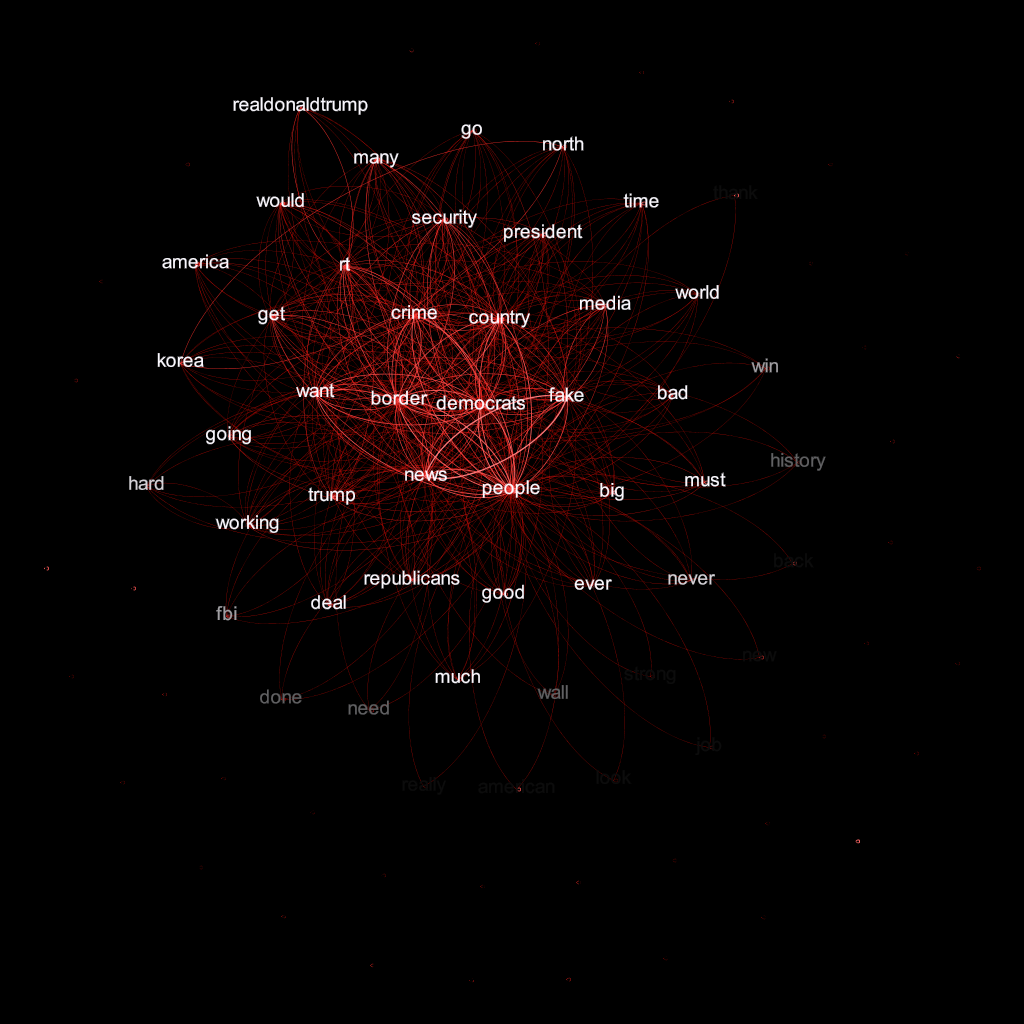

In [7]:
# Everything after this was done in Gephi.
from IPython.display import Image
Image("res/img/network_2.png")

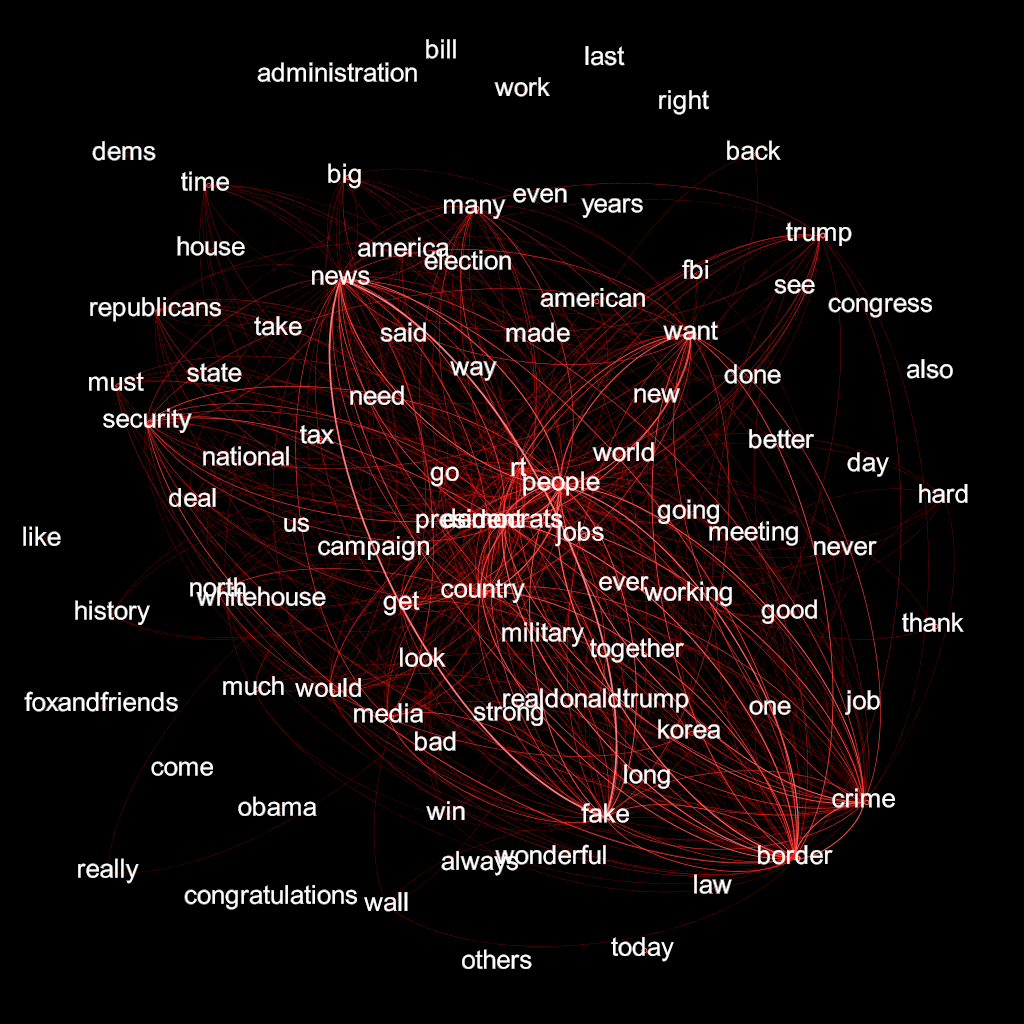

In [8]:
Image("res/img/network_1.png")

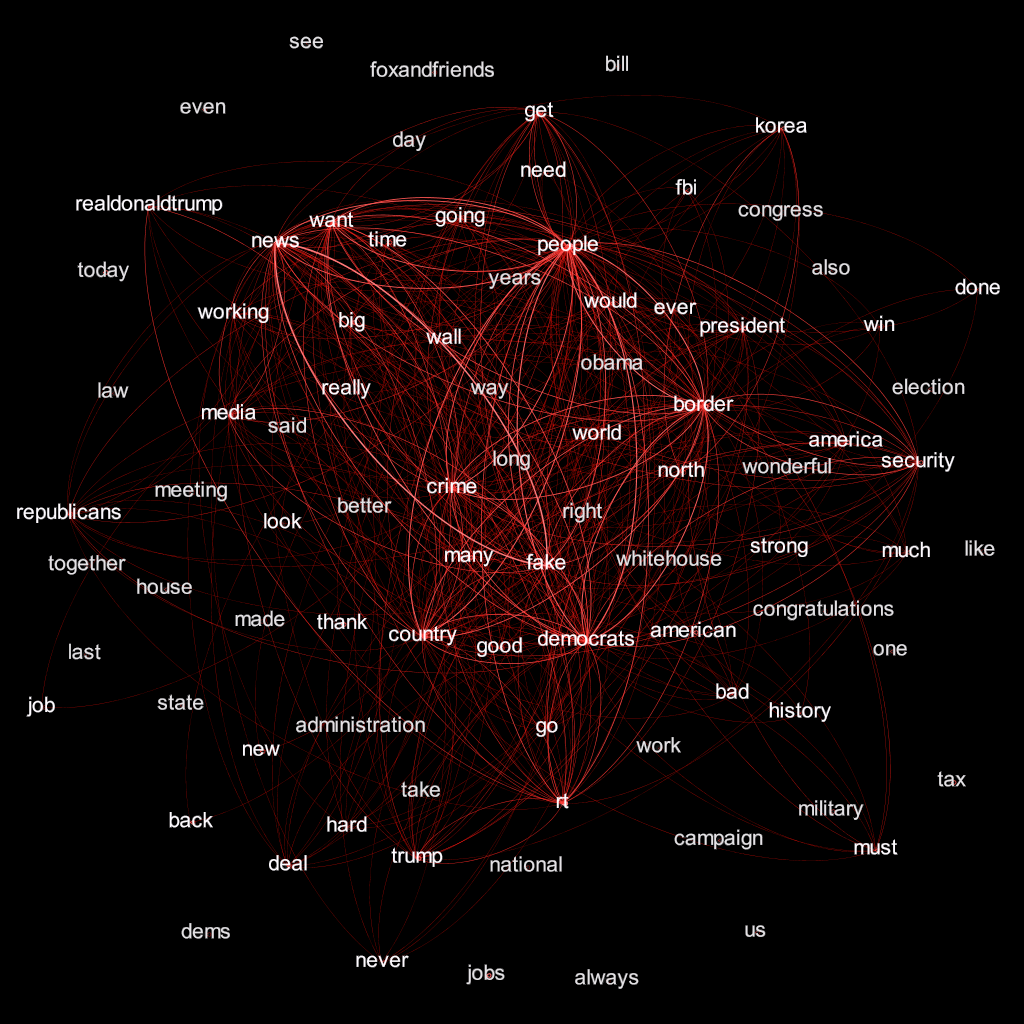

In [9]:
Image("res/img/network_3.png")